<a href="https://colab.research.google.com/github/Maoelan/Project-CO2-Emission-Prediction_Dicoding/blob/main/CO2_Emissions_Prediction_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library / Dependencies**



In [ ]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

# **Load Dataset**


---



DATASET : https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [ ]:
#load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/archive (11)/CO2 Emissions_Canada.csv')

In [ ]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


# **Exploratory Data Analysis**


---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Dari hasil info tersebut dapat disimpulkan bahwa:
*   Terdapat 5 feature dengan tipe categorical atau object yaitu Make, Model, Vehicle Class, Transmission, dan Fuel Type
*   Terdapat 7 feature dengan tipe numeric terdiri dari 4 float64 yaitu Engine Size(L), Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), dan 3 bertipe int64 yaitu Cylinders, Fuel Consumption Comb (mpg) dan CO2 Emissions(g/km)



Deskripsi Variabel

*   Make : Perusahaan yang membuat kendaraan
*   Model : Model dari kendaraan
*   Vehicle Class : Kelas dari kendaraan berdasarkan utilitas, kapasitas dan berat 
*   Engine Size (L) : Ukuran dari mesin dalam satuan liter (L)
*   Cylinders : Jumlah silinder kendaraan (ruang naiknya piston)
*   Transmission : Tipe transmisi dengan jumlah gigi kendaraan
 *   A = Otomatis
 *   AM = Manual Otomatis
 *   AS = Otomatis dengan pilihan shift
 *   AV = Variabel kontinu
 *   M = Manual
 *   X = Angka dari gigi
*   Fuel Type : Tipe bahan bakar
 *   X = Bensin Reguler
 *   Z = Bensin Premium
 *   D = Disel
 *   E = Ethanol (E85)
 *   N = Gas Natural
*   Fuel Consumption City (L/100 km) : Jumlah konsumsi bahan bakar dijalanan kota dalam satuan (L/100 km)
*   Fuel Consumption City (L/100 km) : Jumlah konsumsi bahan bakar dijalanan raya dalam satuan (L/100 km)
*   Fuel Consumption Comb (L/100 km) : Jumlah konsumsi bahan bakar (55% kota. 45% jalan raya) dalam satuan (L/100 km)
*   CO2 Emissions(g/km) : Emisi knalpot karbon dioksida dalam gram/kilometer (g/km) dari gabungan berkendara pada jalanan kota dan jalan raya









In [ ]:
#Menghapus feature yang dianggap kurang penting untuk model
data = data.drop(['Make', 'Model', 'Vehicle Class'], axis = 1)

Mengapa menghapus feature Make, Model dan Vehicle Class?


*   Make : karena ini hanya berisi info nama perusahaan yang membuat kendaraan
*   Model : ini hanya menjelaskan model dari kendaraan
*   Vehicle class : Ini hanya mengkriteriakan model berdasarkan utiliti, kapasitas dan besar lebar kursi penumpang





In [ ]:
#Cek nilai Null
print(data.isna().sum())

Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
#Cek deskripsi stastik data
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Terlihat pada stastitik data bahwa tidak ada kejanggalan dari data stastik yang ditampilkan. Tetapi dapat dilihat pada beberapa feature terdapat gap atau jarak yang lumayan jauh antara nilai pada kuartil ketiga dengan nilai maksimum. Ditakutan ini merupakan data outlier.

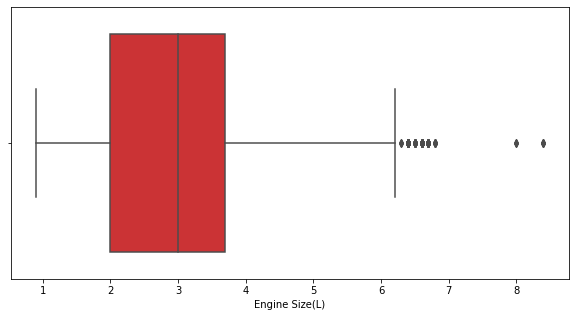

<Figure size 432x288 with 0 Axes>

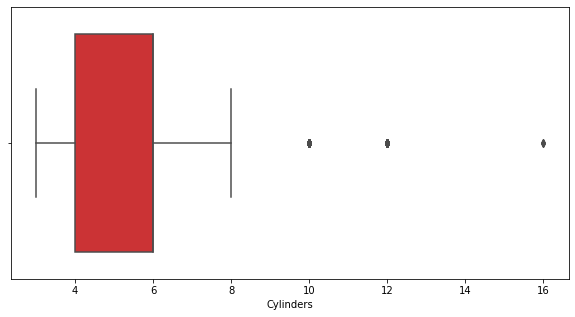

<Figure size 432x288 with 0 Axes>

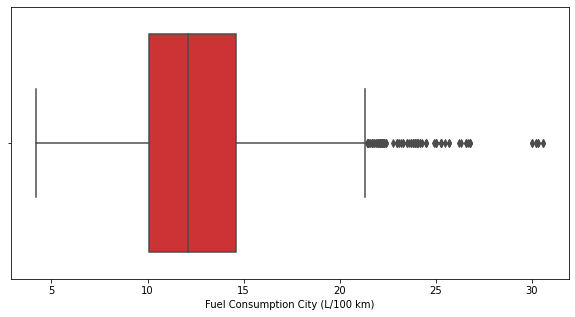

<Figure size 432x288 with 0 Axes>

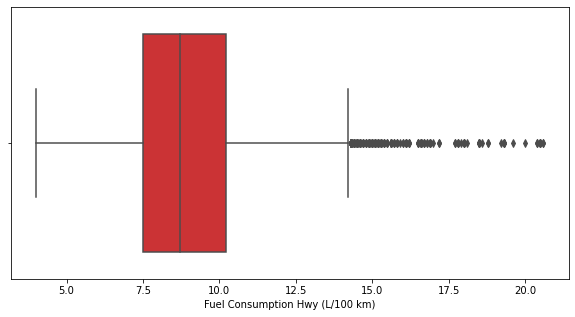

<Figure size 432x288 with 0 Axes>

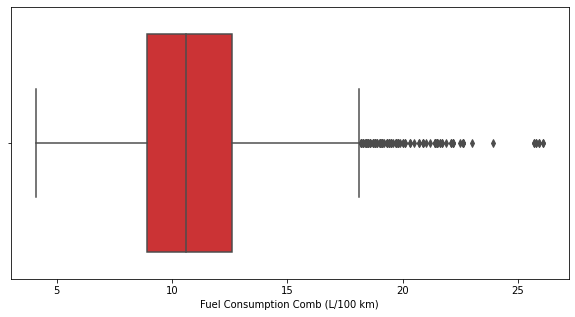

<Figure size 432x288 with 0 Axes>

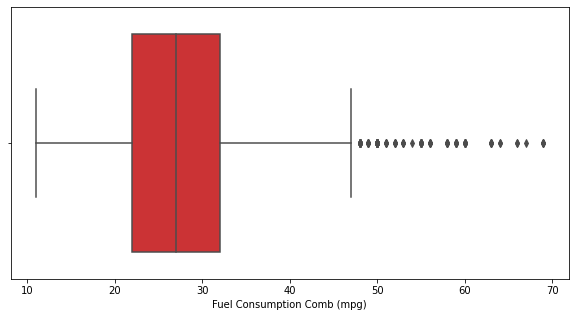

<Figure size 432x288 with 0 Axes>

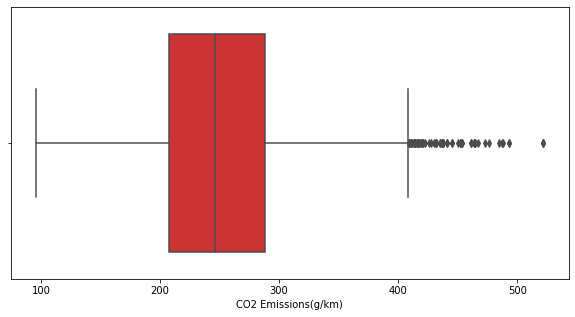

<Figure size 432x288 with 0 Axes>

In [ ]:
#Cek data outlier
num_feat = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
cat_feat = ['Transmission', 'Fuel Type']

for num in num_feat :
  plt.figure(figsize = (10,5))
  sns.boxplot(data = data, x = num, palette = 'Set1')
  plt.figure()

Seperti yang diduga-duga sebelumnya, setelah melakukan visualisasi data menggunakan boxplot terlihat bahwa terdapat data outlier, untuk menghilangkan data outlier, pada kasus ini menggunakan IQR Method

In [ ]:
#IQR Method | Menghapus outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-9-dd27fd8cc411>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
data.shape

(6826, 9)

Setelah menghapus data outlier & menghapus beberapa feature, data yang tadinya sebanyak 7385 x 12 sekarang menjadi 6826 x 9

**Unvariate Analysis**



      Jumlah sample  Persentase
AS6            1300        19.0
AS8            1125        16.5
M6              879        12.9
A6              672         9.8
A8              426         6.2
AM7             391         5.7
A9              334         4.9
AS7             294         4.3
AV              228         3.3
M5              193         2.8
AS10            156         2.3
AV7             117         1.7
AV6             103         1.5
AM6             102         1.5
M7               90         1.3
A5               78         1.1
AS9              77         1.1
AM8              59         0.9
A4               45         0.7
A7               41         0.6
AV8              39         0.6
A10              31         0.5
AS5              26         0.4
AV10             11         0.2
AM5               4         0.1
AM9               3         0.0
AS4               2         0.0


<Axes: xlabel='Transmission', ylabel='count'>

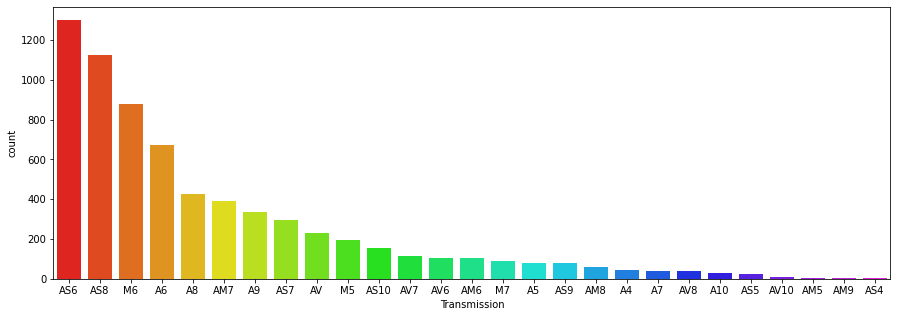

In [ ]:
feature = cat_feat[0] 
count = data[feature].value_counts()

#Categorical
percent = 100 * data[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
plt.figure(figsize = (15,5))
sns.countplot(x = feature, data = data, palette = 'gist_rainbow', order = data['Transmission'].value_counts().index)

Terdapat 27 kategori feature untuk transmission dapat disimpulkan:
*   Transmisi AS (Otomatis dengan pilihan shift) sebanyak 43.6%
*   Transmisi A (Otomatis) sebanyak 23.8%
*   Transmisi M (Manual) sebanyak 17%
*   Transmisi AM (Manual Otomatis) sebanyak 8.2%
*   Transmisi AV (Variabel kontinu) sebanyak 7.2%

Hampir setengah dari total kendaraan memiliki tipe transmisi AS atau otomatis dengan pilihan shift yaitu sebanyak 43.6%


   Jumlah sample  Persentase
X           3490        51.1
Z           2934        43.0
E            226         3.3
D            175         2.6
N              1         0.0


<Axes: xlabel='Fuel Type', ylabel='count'>

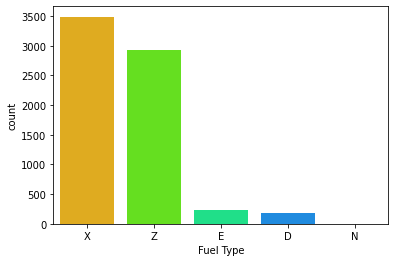

In [ ]:
feature = cat_feat[1]
count = data[feature].value_counts()
percent = 100 * data[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = feature, data = data, palette = 'gist_rainbow', order = data['Fuel Type'].value_counts().index)

Pada Fuel Type terdapat 5 jenis variabel yaitu X, Z, E, D dan N. Dapat disimpulkan bahwa sebagian besar kendaraan menggunakan Fuel Type X dan Z yaitu Bensin Reguler dan Bensin Premium dengan persentase 94.1%

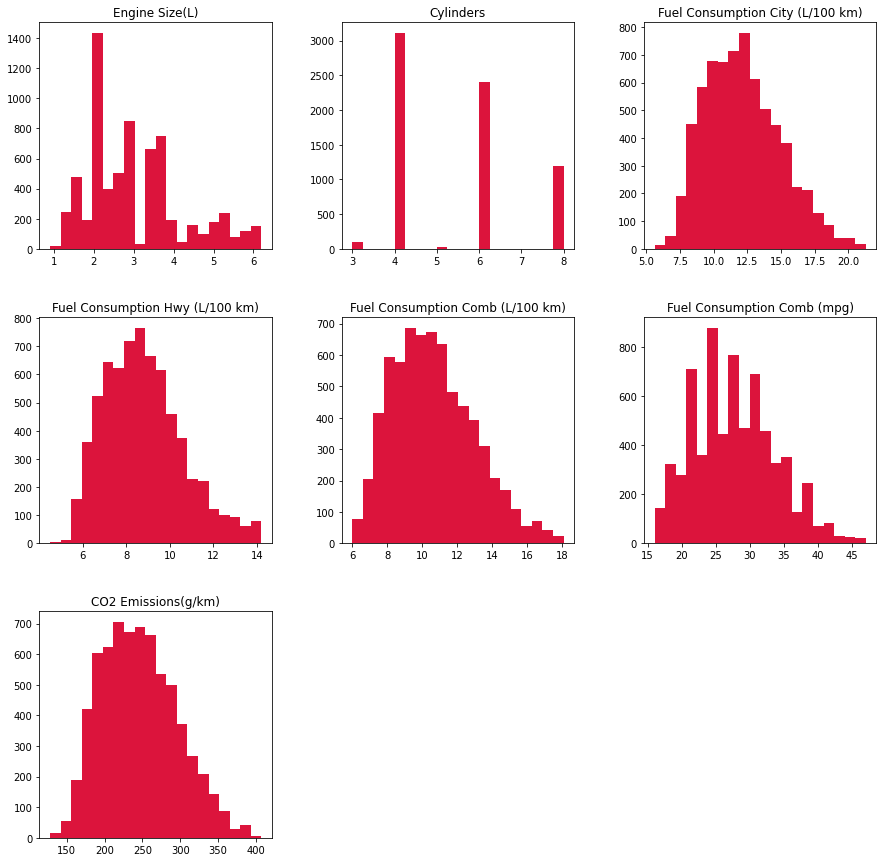

In [ ]:
#Numeric
data.hist(bins = 20, figsize = (15, 15), color = "crimson", grid = False)
plt.show()

Pada histogram diatas khususnya pada feature CO2 Emissions(g/km) dapat disimpulkan bahwa:
*   Peningkatan CO2 Emission sebanding dengan peningkatan jumlah sample. Dapat terlihat pada histogram feature "CO2 Emission" grafik mengalami peningkatan dengan semakin banyaknya sample
*   Kadar CO2 Emission yang dihasilkan 2x dari batas normal yaitu 522 g/km
*   Setengah kadar CO2 Emission berada pada kisaran 246 g/km
*   Kebanyakan kadar C02 Emission terdapat pada quartil ke-1 sampai ke-3
*   Distribusi CO2 Emission miring kekanan (left-skewed) yang berarti nilai median (nilai tengah) terdapat pada quartile ke-3 dan lebih besar dari nilai rata-rata 





**Multivariate Analysis**



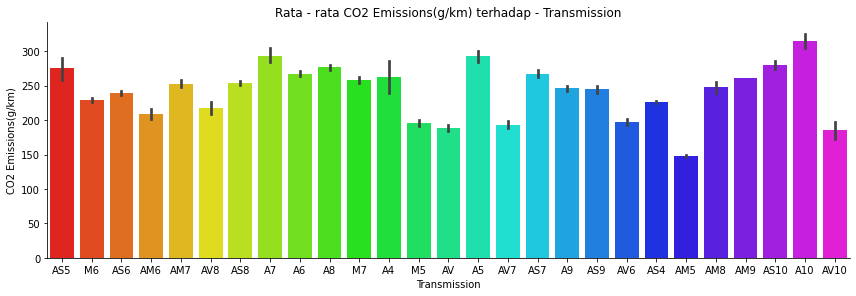

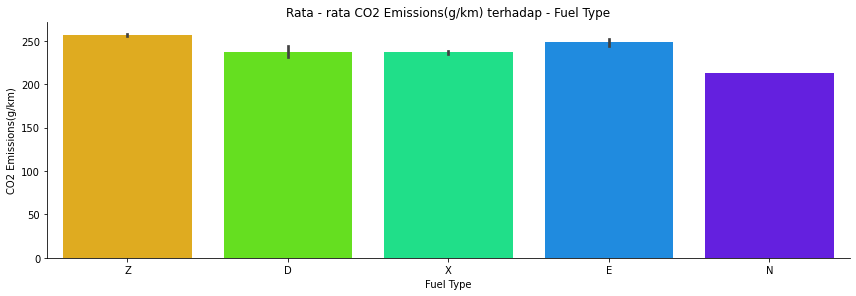

In [ ]:
#Categorical
categorical = data.select_dtypes(include = 'object').columns.to_list()

for col in cat_feat :
  sns.catplot(x = col, y = 'CO2 Emissions(g/km)', kind = 'bar', dodge = False, height = 4, aspect = 3, data = data, palette = 'gist_rainbow')
  plt.title("Rata - rata CO2 Emissions(g/km) terhadap - {}".format(col))

Pada visualisasi terhadap fitur kategori, dapat disimpulkan:
*   Rentang CO2 Emission pada tiap tipe transmission berkisar pada 140 - 300, dapat dilihat distribusi data tidak mengalami penurunan maupun peningkatan yang membuktikan kalau fitur transmission memiliki dampak kecil terhadap CO2 Emission
*   Rentang CO2 Emission pada Fuel Type berada diatas 200 sampai dengan 250, dimana tiap Fuel Type memiliki kemiripan dan rentang yang tidak terlalu berselisih jauh yang membuktikan kalau fitur Fuel Type memiliki dampat kecil terhadap CO2 Emission



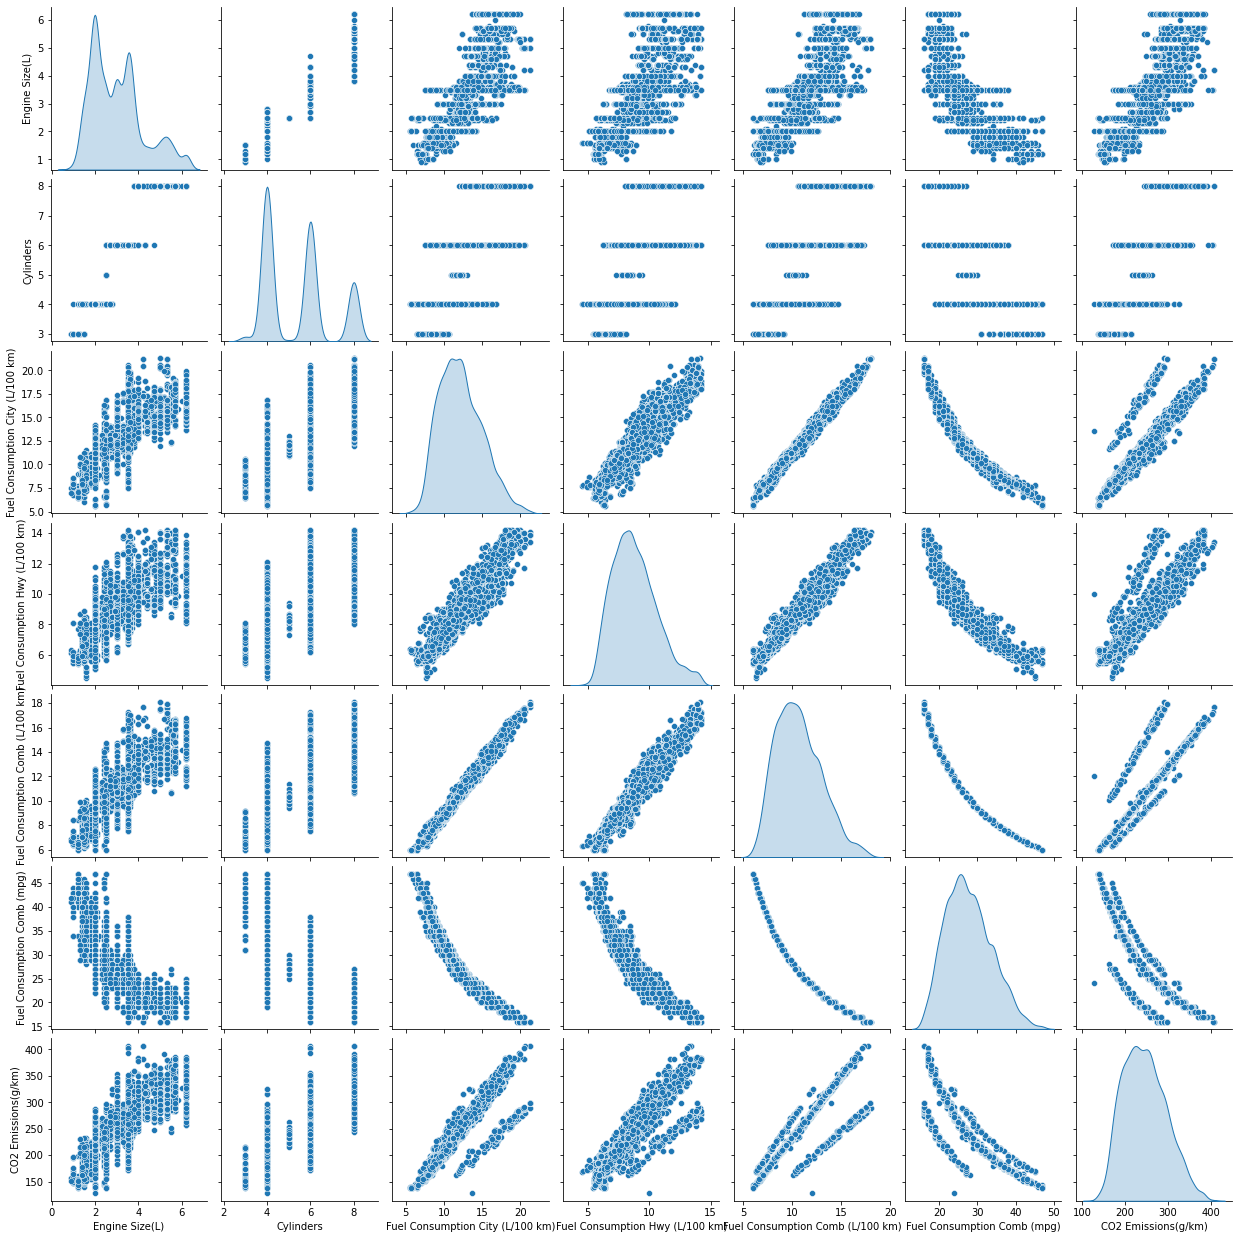

In [ ]:
#Numeric
sns.pairplot(data, diag_kind = 'kde')

Pola sebaran data pada grafik pairplot diatas terlihat bahwa semua feature memiliki korelasi yang tinggi terhadap feature CO2 Emission. Berikut merupakan kesimpulan dari korelasi pairplot diatas:
* Engine Size(L) : Positive Correlation
* Cylinders : Positive Correlation
* Fuel Consumption City (L/100 km) : Positive Correlation
* Fuel Consumption Hwy (L/100 km) : Positive Correlation
* Fuel Consumption Comb (L/100 km) : Positive Correlation
* Fuel Consumption Comb (mpg) : Negative Correlation

Untuk membuktikan hal tersebut dapat dilakukan evaluasi skor korelasi menggunakan fungsi corr() seperti dibawah



Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

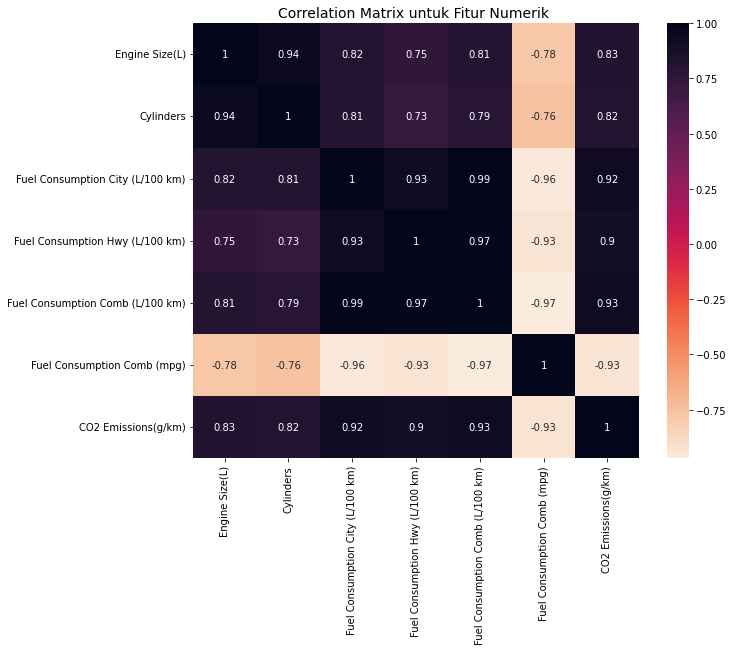

In [ ]:
#Skor korelasi
plt.figure(figsize = (10,8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix untuk Fitur Numerik ", size = 14)

Terbukti apabila rata-rata feature memiliki korelasi dengan CO2 Emissions yang rata-rata skor korelasi diatas 0.8 untuk positive correlation, dan -0.9 untuk negative correlation, sehingga tidak ada feature yang perlu dihapus

# **Data Preparation**

---



**Encoding Fitur Kategori**

In [ ]:
#LabelEncoder
le = LabelEncoder()
le.fit(data['Transmission'])
data['Transmission'] = le.transform(data['Transmission'])
transmission_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(transmission_labels)

{'A10': 0, 'A4': 1, 'A5': 2, 'A6': 3, 'A7': 4, 'A8': 5, 'A9': 6, 'AM5': 7, 'AM6': 8, 'AM7': 9, 'AM8': 10, 'AM9': 11, 'AS10': 12, 'AS4': 13, 'AS5': 14, 'AS6': 15, 'AS7': 16, 'AS8': 17, 'AS9': 18, 'AV': 19, 'AV10': 20, 'AV6': 21, 'AV7': 22, 'AV8': 23, 'M5': 24, 'M6': 25, 'M7': 26}


Mengubah categorical pada feature Transmission menjadi numerik agar lebih baik diproses oleh model menggunakan LabelEncoder

In [ ]:
#OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['Fuel Type'], prefix = 'Fuel_Type')], axis = 1)

Melakukan OneHotEncoder pada feature Fuel Type agar mendapatkan feature baru berdasarkan nilai dari Fuel Type yang mewakili variabel kategori Fuel Type

In [ ]:
data

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_Type_D,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z
0,2.0,4,14,Z,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,25,Z,11.2,7.7,9.6,29,221,0,0,0,0,1
3,3.5,6,15,Z,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,15,Z,12.1,8.7,10.6,27,244,0,0,0,0,1
5,3.5,6,15,Z,11.9,7.7,10.0,28,230,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,17,Z,10.7,7.7,9.4,30,219,0,0,0,0,1
7381,2.0,4,17,Z,11.2,8.3,9.9,29,232,0,0,0,0,1
7382,2.0,4,17,Z,11.7,8.6,10.3,27,240,0,0,0,0,1
7383,2.0,4,17,Z,11.2,8.3,9.9,29,232,0,0,0,0,1


**Reduksi Dimensi menggunakan PCA**

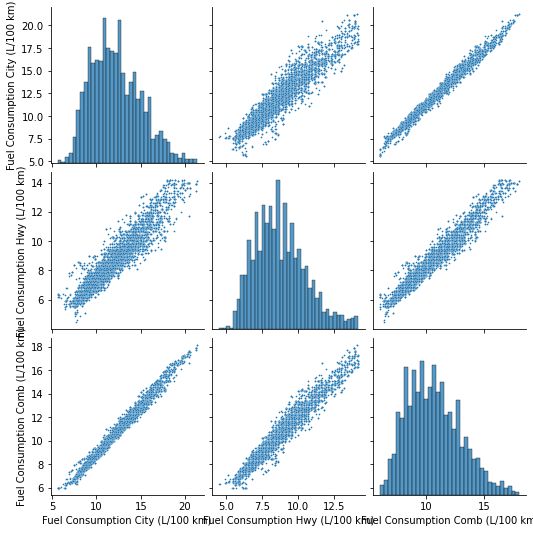

In [ ]:
sns.pairplot(data[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']], plot_kws = {'s' : 3})

Pada pairplot diatas terlihat kalau ketiga feature yaitu Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) dan Fuel Consumption Comb (L/100 km) memiliki korelasi yang cukup tinggi sehingga dapat dilakukan proses reduksi dimensi

In [ ]:
#PCA
pca = PCA(n_components = 3, random_state = 50)
pca.fit(data[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']])
princ_comp = pca.transform(data[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.982, 0.018, 0.   ])

Dapat dilihat kalau 98.2% informasi dari ketiga fitur tersebut terdapat pada PCA pertama, sehingga reduksi dimensi akan mempertahankan PC yang pertama menggantikan ketiga fitur tersebut. Ketiga fitur tersebut akan digantikan dengan fitur baru bernama Fuel Consumption seperti yang terlihat dibawah

In [ ]:
pca = PCA(n_components = 1, random_state = 50)
pca.fit(data[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']])
data['Fuel Consumption'] = pca.transform(data.loc[:, ('Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)')]).flatten()
data.drop(['Fuel Type','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'], axis = 1, inplace = True)

In [ ]:
data

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_Type_D,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z,Fuel Consumption
0,2.0,4,14,33,196,0,0,0,0,1,-3.734173
1,2.4,4,25,29,221,0,0,0,0,1,-1.765973
3,3.5,6,15,25,255,0,0,0,0,1,0.744926
4,3.5,6,15,27,244,0,0,0,0,1,-0.132316
5,3.5,6,15,28,230,0,0,0,0,1,-1.050848
...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,17,30,219,0,0,0,0,1,-2.227377
7381,2.0,4,17,29,232,0,0,0,0,1,-1.332506
7382,2.0,4,17,27,240,0,0,0,0,1,-0.625553
7383,2.0,4,17,29,232,0,0,0,0,1,-1.332506


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Engine Size(L)               6826 non-null   float64
 1   Cylinders                    6826 non-null   int64  
 2   Transmission                 6826 non-null   int64  
 3   Fuel Consumption Comb (mpg)  6826 non-null   int64  
 4   CO2 Emissions(g/km)          6826 non-null   int64  
 5   Fuel_Type_D                  6826 non-null   uint8  
 6   Fuel_Type_E                  6826 non-null   uint8  
 7   Fuel_Type_N                  6826 non-null   uint8  
 8   Fuel_Type_X                  6826 non-null   uint8  
 9   Fuel_Type_Z                  6826 non-null   uint8  
 10  Fuel Consumption             6826 non-null   float64
dtypes: float64(2), int64(4), uint8(5)
memory usage: 406.6 KB


**Train-Test-Split**

Sebelum dilakukan train-test-split, langkah awal adalah memisahkan antara feature dan label, variabel x digunakan untuk menampung feature yang tediri dari:
*   Engine Size(L)
*   Cylinders
*   Transmission
*   Fuel Consumption Comb (mpg)
*   Fuel_Type_D
*   Fuel_Type_E
*   Fuel_Type_N
*   Fuel_Type_X
*   Fuel_Type_Z
*   Fuel Consumption

Dan variabel x digunakan untuk menampung label yaitu 
*   CO2 Emissions(g/km)

Kemudian akan dilakukan pembagian data sebesar 80:20 dengan train_test_split




In [ ]:
#x,y
x = data.drop(['CO2 Emissions(g/km)'], axis = 1)
y = data['CO2 Emissions(g/km)']

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
print(f'Total sample in whole dataset : {len(x)}')
print(f'Total sample in trian dataset : {len(x_train)}')
print(f'Total sample in test dataset : {len(x_test)}')

Total sample in whole dataset : 6826
Total sample in trian dataset : 5460
Total sample in test dataset : 1366


Dapat dilihat dari total 6826 data setelah dilakukan splitting data, data terbagi menjadi 5460 train dan 1366 test

**Standarisasi**

In [ ]:
#Standarisasi MinMaxScaler
num_feat = ['Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Consumption Comb (mpg)']
scaler = MinMaxScaler()
scaler.fit(x_train[num_feat])
x_train[num_feat] = scaler.transform(x_train.loc[:, num_feat])
x_train[num_feat]

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg)
1953,0.584906,0.6,0.076923,0.161290
3526,0.301887,0.2,0.576923,0.451613
5841,0.358491,0.2,0.115385,0.387097
1173,0.396226,0.6,0.653846,0.387097
5211,0.056604,0.0,0.923077,0.870968
...,...,...,...,...
6514,0.207547,0.2,0.192308,0.516129
93,0.207547,0.2,0.192308,0.483871
4268,0.301887,0.2,0.961538,0.451613
6440,0.490566,0.6,0.653846,0.354839


In [ ]:
x_train[num_feat].describe().round(4)

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg)
count,5460.0000,5460.0000,5460.0000,5460.0000
mean,0.3990,0.4785,0.5498,0.3786
std,0.2274,0.3016,0.2776,0.1943
min,0.0000,0.0000,0.0000,0.0000
25%,0.2075,0.2000,0.3077,0.2258
50%,0.3962,0.6000,0.5769,0.3548
75%,0.5094,0.6000,0.6923,0.5161
max,1.0000,1.0000,1.0000,1.0000


Setelah dilakukan standarisasi dengan MinMaxScaler dapat terlihat bahwa min dari data yaitu 0 dan max dari data yaitu 1, karena standarisasi MinMaxScaler menghasilkan distribusi data yang ada pada rentang 0 dan 1

# **Model Development**

---



Pada tahapan model development ini algoritma machine learning yang digunakan terdiri dari:

1. Linear Regression
2. Decision Tree Regression
3. SVM
4. KNN
5. Random Forest
6. Boosting

In [ ]:
#Dataframe untuk analisis model
models = pd.DataFrame(index = ['train_mse', 'test_mse'],
                      columns = ['LinearRegressor', 'DecisionTreeRegressor', 'KNN', 'RandomForest', 'Boosting'])

**Model Training**

In [ ]:
#Melatih data dengan LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

models.loc['train_mse', 'LinearRegressor'] = mean_squared_error(y_pred = lin_reg.predict(x_train), y_true = y_train)

In [ ]:
#Melatih data dengan DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth = 10, random_state = 20)
DTR.fit(x_train, y_train)

models.loc['train_mse', 'DecisionTreeRegressor'] = mean_squared_error(y_pred = DTR.predict(x_train), y_true = y_train)

Penjelasan paramater
* max_depth = 10 : kedalaman pohon
* random_state = 20 : digunakan untuk random generator

In [ ]:
#Melatih data dengan K-Nearest Neighbor
KNN = KNeighborsRegressor(n_neighbors = 7)
KNN.fit(x_train, y_train)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred = KNN.predict(x_train), y_true = y_train)

Penjelasan parameter
* n_neighbors = 7 : jumlah tetangga yang digunakan untuk mengukur jarak

In [ ]:
#Melatih data dengan LinearRegression
RF = RandomForestRegressor(n_estimators = 50, max_depth = 15, random_state = 55, n_jobs = -1)
RF.fit(x_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred = RF.predict(x_train), y_true = y_train)

Penjelasan parameter
* n_estimators = 50 : jumlah tree pada forest
* max_depth = 15 : kedalaman pohon
* random_state = 55 : digunakan untuk random generator
* n_jobs = -1 : jumlah job yang digunakan secara pararel

In [ ]:
#Melatih data dengan Ada Boosting Regressor
boosting = AdaBoostRegressor(learning_rate = 0.9, random_state = 50, n_estimators = 10)
boosting.fit(x_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred = boosting.predict(x_train), y_true = y_train)

Penjelasan parameter
* learning_rate = 0.9 : bobot pada regressor pada masing-masing iterasi
* random_state = 50 : digunakan untuk random generator
* n_estimators = 10 : jumlah base estimator yang ingin digunakan dalam data

**Evaluasi Model**

In [ ]:
x_test.loc[:, num_feat] = scaler.transform(x_test[num_feat])

Sebelum menghitung MSE pada model, perlu dilakukan scaling terlebih dahulu pada data uji

In [ ]:
#Model Evaluation
mse = pd.DataFrame(columns = ['train', 'test'], index = ['LinearRegressor', 'DecisionTreeRegressor', 'KNN', 'RandomForest', 'Boosting'])

model_dict = {'LinearRegressor' : lin_reg, 'DecisionTreeRegressor' : DTR, 'KNN' : KNN, 'RandomForest' : RF, 'Boosting' : boosting}

for name, model in model_dict.items() :
  mse.loc[name, 'train'] = mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))/1e3
mse

,train,test
LinearRegressor,0.013481,0.014259
DecisionTreeRegressor,0.004165,0.010623
KNN,0.007251,0.011366
RandomForest,0.002074,0.009687
Boosting,0.080138,0.078409


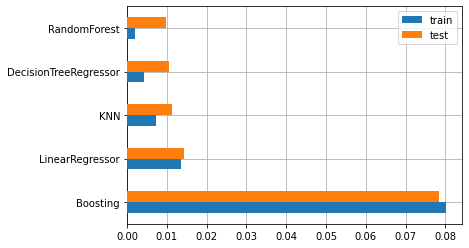

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by = 'test', ascending = False).plot(kind = 'barh', ax = ax, zorder = 3)
ax.grid(zorder = 0)

Diperhatikan pada tabel diatas dapat dilihat bahwa model Random Forest memberikan error yang paling kecil diikuti dengan Decision Tree, KNN, dan LinearRegression, kemudian model Boosting memiliki error yang paling besar

Untuk menguji model yang telah dilatih, disini akan dilakukan proses prediksi menggunakan CO2 Emission pada data test

In [ ]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true' : y_test[:1]}
for name, model in model_dict.items() :
  pred_dict['prediksi_' + name] = model.predict(prediksi).round(2)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegressor,prediksi_DecisionTreeRegressor,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting
4456,208,207.0,207.83,207.71,207.88,216.71


Dapat dilihat pada hasil prediksi data test diatas dapat disumpulkan:
*   Model Random Forest mendapatkan prediksi paling tepat dengan nilai 207.88
*   Model Decision Tree mendapatkan prediksi 207.83
*   Model KNN mendapatkan prediksi 207.71
*   Model Linear Regression mendapatkan prediksi 207.0
*   Model Ada Boosting mendapatkan prediksi 216.71

Dapat disumpulkan bahwa hasil prediksi sesuai dengan tabel error yang ditampilkan diatas

